<a href="https://colab.research.google.com/github/Parths131/traffic-forecasting/blob/main/sarima_trivandrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving blr-traffic-data.csv to blr-traffic-data (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
path = '/content/blr-traffic-data.csv'
df = pd.read_csv(path)

In [ ]:
order = (3,1,2)
seasonal_order = (2,1,2,12)

In [ ]:
df_excluded = df[['Month','tri2']]
df_excluded = df_excluded[33:107]

In [ ]:
df_excluded

,Month,tri2
33,Jan-14,"1,79,109"
34,Feb-14,"1,47,751"
35,Mar-14,"1,59,508"
36,Apr-14,"1,76,950"
37,May-14,"1,91,072"
...,...,...
102,Oct-19,"1,83,076"
103,Nov-19,"1,77,349"
104,Dec-19,"1,97,349"
105,Jan-20,"1,98,012"


In [ ]:
df_excluded['Month'] = pd.to_datetime(df_excluded['Month'], format='%b-%y')

In [ ]:
df_excluded['tri2'] = df_excluded['tri2'].str.replace(',', '').astype(int)

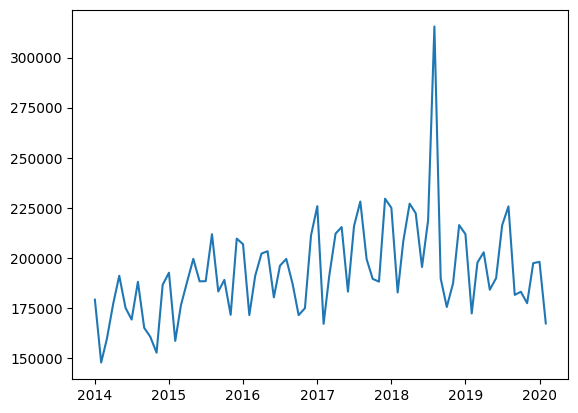

In [ ]:
plt.plot(df_excluded['Month'], df_excluded['tri2'])

In [ ]:
adf_test = adfuller(df_excluded['tri2'].diff(12).diff(12).dropna())

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -3.6278739152793134
p-value: 0.005249961134548203


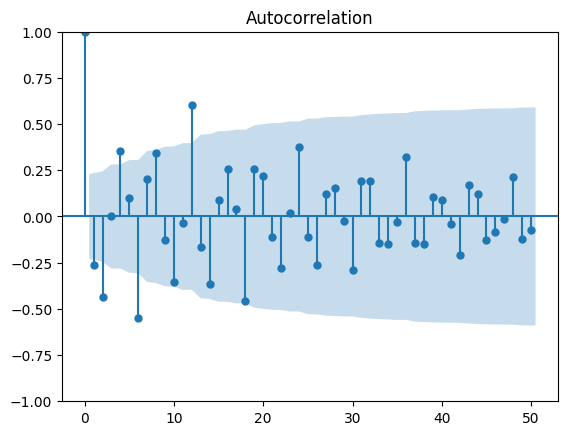

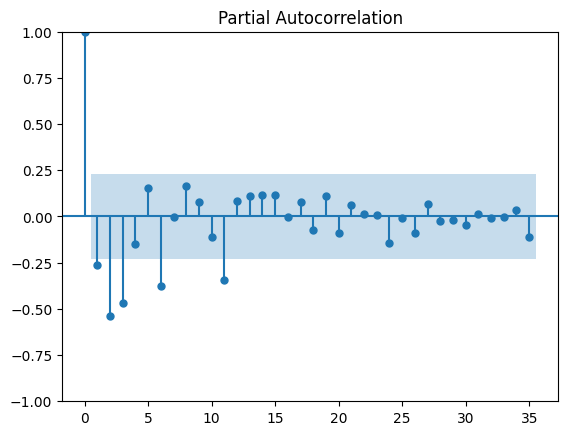

In [ ]:
acf_original = plot_acf(df_excluded['tri2'].diff().dropna(), lags=50)

pacf_original = plot_pacf(df_excluded['tri2'].diff().dropna(), lags=35)

In [ ]:
test_start = datetime(2019, 8, 1)
df_train = df_excluded[(df_excluded['Month'] < test_start)]

In [ ]:
df_test = df_excluded[(df_excluded['Month'] >= test_start)]

In [ ]:
testing_range = pd.date_range(start=datetime(2019, 8, 1), end=datetime(2020, 2, 1), freq='MS')

model = SARIMAX(df_train['tri2'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

testing = model_fit.forecast(steps=len(testing_range))

testing_df = pd.DataFrame({'Month': testing_range, 'tri2': testing})

print(testing_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


        Month           tri2
67 2019-08-01  306508.975824
68 2019-09-01  172935.815799
69 2019-10-01  166384.508877
70 2019-11-01  184707.904056
71 2019-12-01  205937.914728
72 2020-01-01  189574.166436
73 2020-02-01  158954.050764


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
testing_df = testing_df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
rmse = np.sqrt(np.mean((df_test['tri2'] - testing_df['tri2']) ** 2))

mae = np.mean(np.abs(df_test['tri2'] - testing_df['tri2']))

rmse, mae

(31962.426638215144, 19823.607533105514)

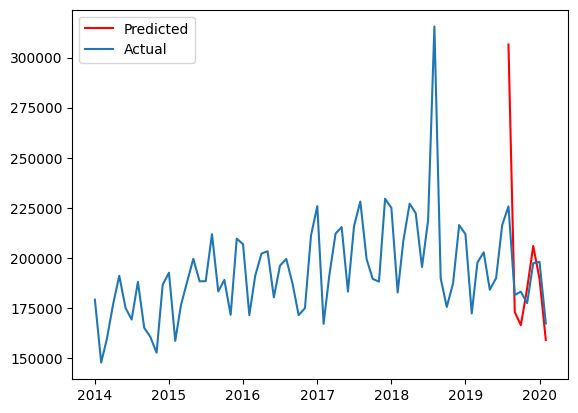

In [ ]:
plt.plot(testing_df['Month'], testing_df['tri2'], label='Predicted', color='red')
plt.plot(df_excluded['Month'], df_excluded['tri2'], label='Actual')
plt.legend()

In [ ]:
forecast_range = pd.date_range(start=datetime(2020, 3, 1), end=datetime(2049, 12, 31), freq='MS')

model = SARIMAX(df_excluded['tri2'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

predictions_df = pd.DataFrame({'Month': forecast_range, 'tri2': predictions})

print(predictions_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


         Month           tri2
107 2020-03-01  197519.503465
108 2020-04-01  195142.286839
109 2020-05-01  183387.116508
110 2020-06-01  186326.138182
111 2020-07-01  212911.002562
..         ...            ...
460 2049-08-01  319077.103323
461 2049-09-01  272315.310691
462 2049-10-01  271157.950601
463 2049-11-01  265270.018754
464 2049-12-01  290469.607918

[358 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


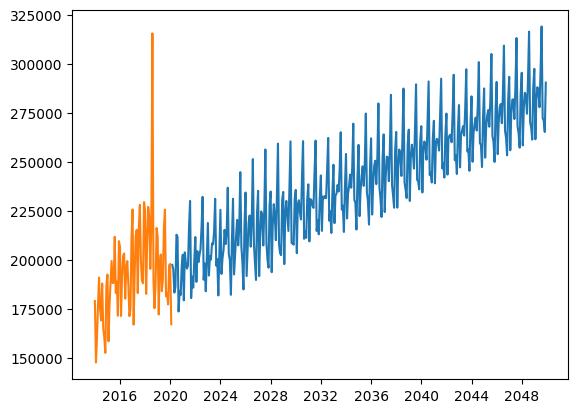

In [ ]:
plt.plot(predictions_df['Month'], predictions_df['tri2'], label='Predicted')
plt.plot(df_excluded['Month'], df_excluded['tri2'], label='Predicted')

In [ ]:
predictions_df

,Month,tri2
107,2020-03-01,197519.503465
108,2020-04-01,195142.286839
109,2020-05-01,183387.116508
110,2020-06-01,186326.138182
111,2020-07-01,212911.002562
...,...,...
460,2049-08-01,319077.103323
461,2049-09-01,272315.310691
462,2049-10-01,271157.950601
463,2049-11-01,265270.018754


In [ ]:
#from pmdarima import auto_arima

In [ ]:
#auto_model = auto_arima(df_train['tri1'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

#print(auto_model.summary())